# Overview



## Decision Trees vs. MLPs

What are the main differences between nonlinear models MLPs and Decision Trees?

There are 2 main differences: 

- 1) Decision boundary: arbitrary curves for MLPs but *segments* parallel with axes for Decision Trees. For regression surface: arbitrary for MLPs but *block-wise* for Decision Trees 

- 2) Explainability 

## Decision Trees' predicted output

- How outputs are calculated? How to measure its quality?

- For regression: average of data subset at leaf nodes; smaller spreading (standard deviation) is better. 

- For classification: majority label of data subset at leaf nodes; smaller entropy is better. 


# 1. Iris Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt
from matplotlib import rcParams
# matplotlib options
rcParams['figure.figsize'] = (12, 7) # default figsize
rcParams['axes.grid'] = False # turn off grid by default

## 2. Decision Boundary of Decision Tree

I will use the Decision Tree to classify the flowers of Iris classes **`Setosa, Versicolor, Virginica`**

Iris dataset includes 4 features: **`petal length, petal width, sepal length, sepal width`**.

In this project, I will use only 2 features **`petal length, petal width`** to visualize decision boundary easily.

### 2.1 Prepare Iris dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

### 2.2 Check shape of X, y

In [ ]:
# TODO
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (150, 2)
Shape of y: (150,)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Check the balance between labels in the dataset

Text(0.5, 1.0, 'Classes distribution')

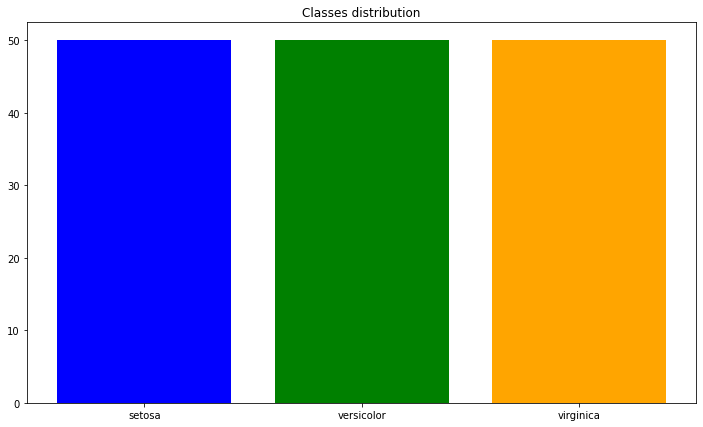

In [ ]:
# 1. Plot bar chart to show the distribution of 3 classes in Iris dataset

class_names = iris.target_names
data = np.unique(y, return_counts=True)[1]
plt.bar(class_names, data, color=['blue', 'green', 'orange'])
plt.title('Classes distribution')

### 2.3 Train Test Split

In [ ]:
# 1. Split X, y into Train and Test Set
# 2. test_size=0.4
# 3. Remember to set stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, shuffle=True, random_state=1612)

### 2.4 Create and Train the Decision Tree

**Be carefil with the accuracy of model on both the Train Set and Test Set**

In [ ]:
# 1. Import DecisionTreeClassifier from sklearn
# 2. Create a tree with max_depth=4 and criterion='entropy', random_state=1612
# 3. Fit model on X_train, y_train
# 4. Use score() function on Train Set and Test Set

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=1612, max_depth=4)
model.fit(X_train, y_train)
print('Accuracy on Train Set', model.score(X_train, y_train))
print('Accuracy on Test Set', model.score(X_test, y_test))

Accuracy on Train Set 0.9888888888888889
Accuracy on Test Set 0.9333333333333333


### 2.5 Decision boundary

In [ ]:
def plot_decision_boundary(X, Y, model, title):
  plt.title(title)

  range = 0.05
  xm = np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, range)
  xlen = len(xm)
  ym = np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, range)
  ylen = len(ym)
  xx, yy = np.meshgrid(xm, ym)

  xx1 = xx.ravel().reshape(1, xx.size)
  yy1 = yy.ravel().reshape(1, yy.size)

  X0 = np.vstack((xx1, yy1)).T

  Y_hat = model.predict(X0)

  Z = Y_hat

  Z = Z.reshape(xx.shape)
  CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

  plt.scatter(X[:,0], X[:,1], c=Y, s=10)
  plt.xlim(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5)
  plt.ylim(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5)
  plt.show()

In [ ]:
type(X)

numpy.ndarray

### 2.6 Visualize a draft scatter plot of data points

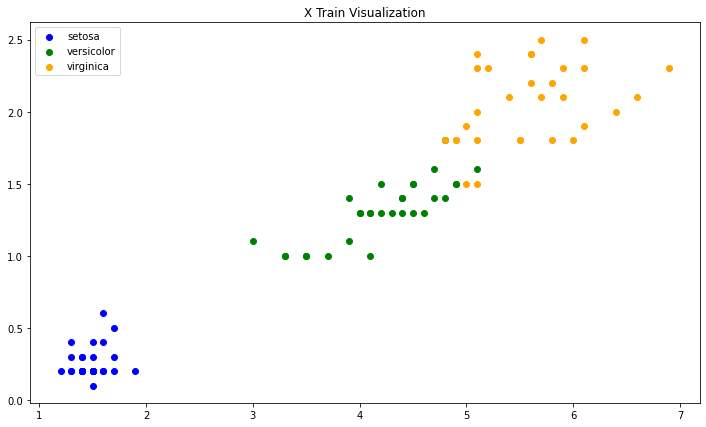

In [ ]:
plt.scatter(X_train[np.where(y_train==0)[0]][:,0], X_train[np.where(y_train==0)[0]][:,1], c='blue')
plt.scatter(X_train[np.where(y_train==1)[0]][:,0], X_train[np.where(y_train==1)[0]][:,1], c='green')
plt.scatter(X_train[np.where(y_train==2)[0]][:,0], X_train[np.where(y_train==2)[0]][:,1], c='orange')

plt.legend(iris.target_names)
plt.title('X Train Visualization')
plt.show()

### 2.7 Decision boundary on Train Set

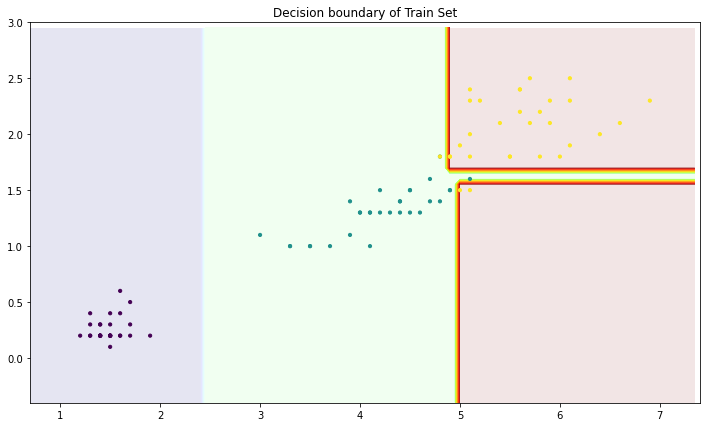

In [ ]:
plot_decision_boundary(X_train, y_train, model, 'Decision boundary of Train Set')

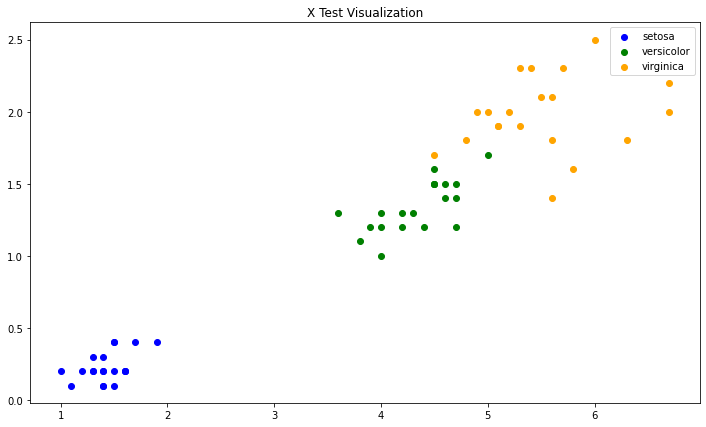

In [ ]:
plt.scatter(X_test[np.where(y_test==0)[0]][:,0], X_test[np.where(y_test==0)[0]][:,1], c='blue')
plt.scatter(X_test[np.where(y_test==1)[0]][:,0], X_test[np.where(y_test==1)[0]][:,1], c='green')
plt.scatter(X_test[np.where(y_test==2)[0]][:,0], X_test[np.where(y_test==2)[0]][:,1], c='orange')

plt.legend(iris.target_names)
plt.title('X Test Visualization')
plt.show()

### 2.8 Decision boundary of model on X_test

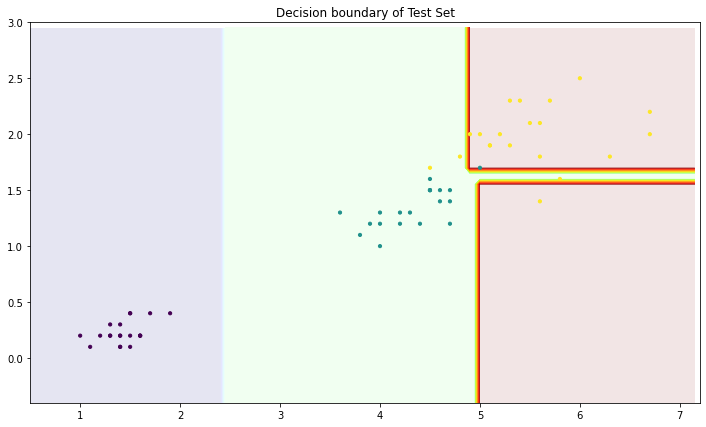

In [ ]:
plot_decision_boundary(X_test, y_test, model, 'Decision boundary of Test Set')

**Observing the accuracy of the model and the above decision boundary, the model is Overfit.**

### 2.9 Decision Tree's Hyper-Parameters Tuning


**Reference**

[What is a hyper-parameter](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)

[Hyper-parameters in Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Decision Tree model in the SkLearn has many hyper-parameters.

I will proceed tuning with only some common hyper-parameters for this dataset.



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy','gini'],
    'max_leaf_nodes': list(range(2, 30)),
    'max_depth': list(range(2, 10)),
    'min_samples_split': np.linspace(0.1, 1.0, 10), 
    'max_features': [1,2],
}

model = DecisionTreeClassifier( random_state=1612)

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 2,
 'max_leaf_nodes': 3,
 'min_samples_split': 0.1}

### 2.10 Get the best_model after tuning and evaluating on the Train Set and Test Set

In [ ]:
best_model = grid.best_estimator_
print('Accuracy on Train Set', best_model.score(X_train, y_train))
print('Accuracy on Test Set', best_model.score(X_test, y_test))

Accuracy on Train Set 0.9666666666666667
Accuracy on Test Set 0.95


** Accuracy of the model has been improved on the Test Set**

### 2.11 Plot the Decision boundary again

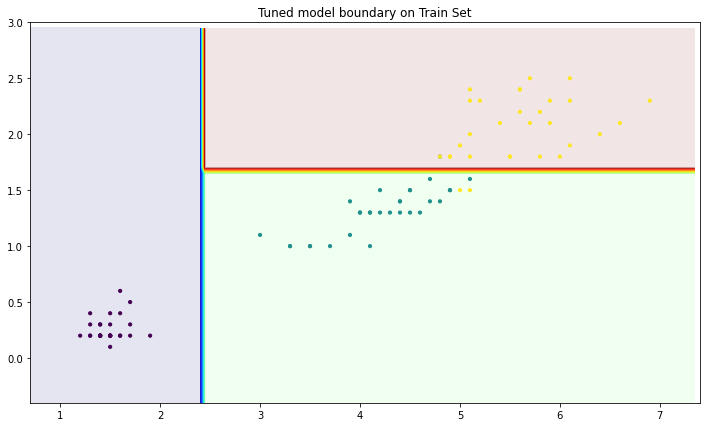

In [ ]:
plot_decision_boundary(X_train, y_train, best_model, 'Tuned model boundary on Train Set')

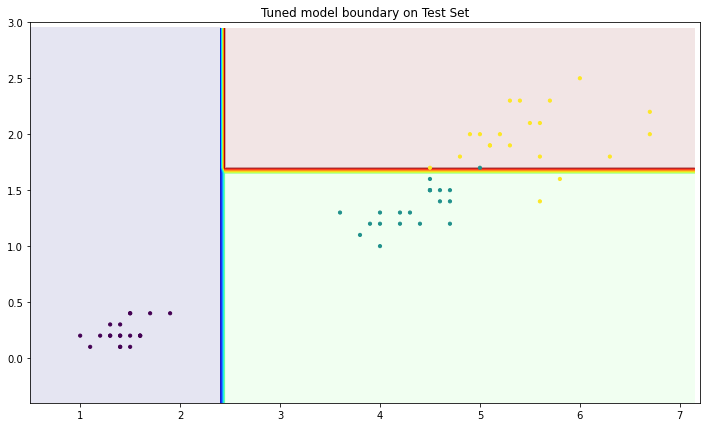

In [ ]:
plot_decision_boundary(X_test, y_test, best_model, 'Tuned model boundary on Test Set')

### 2.12 Plot the Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# draw tree
def drawTree(model):
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names = iris.feature_names[2:],
                  class_names= iris.target_names
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return graph.create_png()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


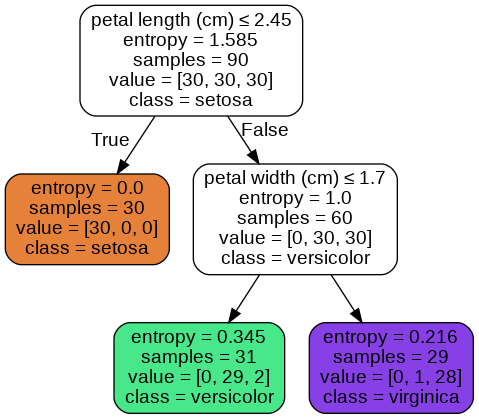

In [ ]:
Image(drawTree(best_model))

### 2.13 Explain



If the petal length is <= 2.42, it will be the class setosa. If not, in the case of pedal with <= 1.7, the class will be versicolor. Otherwise, it will be virginica.

# 3. Pima Indians Diabetes Classification

## 4. Decision Tree versus Random Forest for Pima Indians Diabetes

Dataset include health information of female patients (from 21 years old and above) in India.

The Target is to design Decision Tree and Random Forest models to predict whether they would be diabetes or not based on their health information.

**DATASET LINK** https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt
from matplotlib import rcParams

### 4.1. Prepare the dataset

In [3]:
import pandas as pd

PATH = '/content/drive/My Drive/Colab Notebooks/Projects/Pima Indians Diabetes Database/diabetes.csv'

df = pd.read_csv(PATH)

### 4.2 Check the shape

In [4]:
df.shape

(768, 9)

### 4.3 View the first 10 rows

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 4.4 Check null and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4.5 Visualize data

**Reference**

[Pairplot Intuition](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

**Draw pairplot**

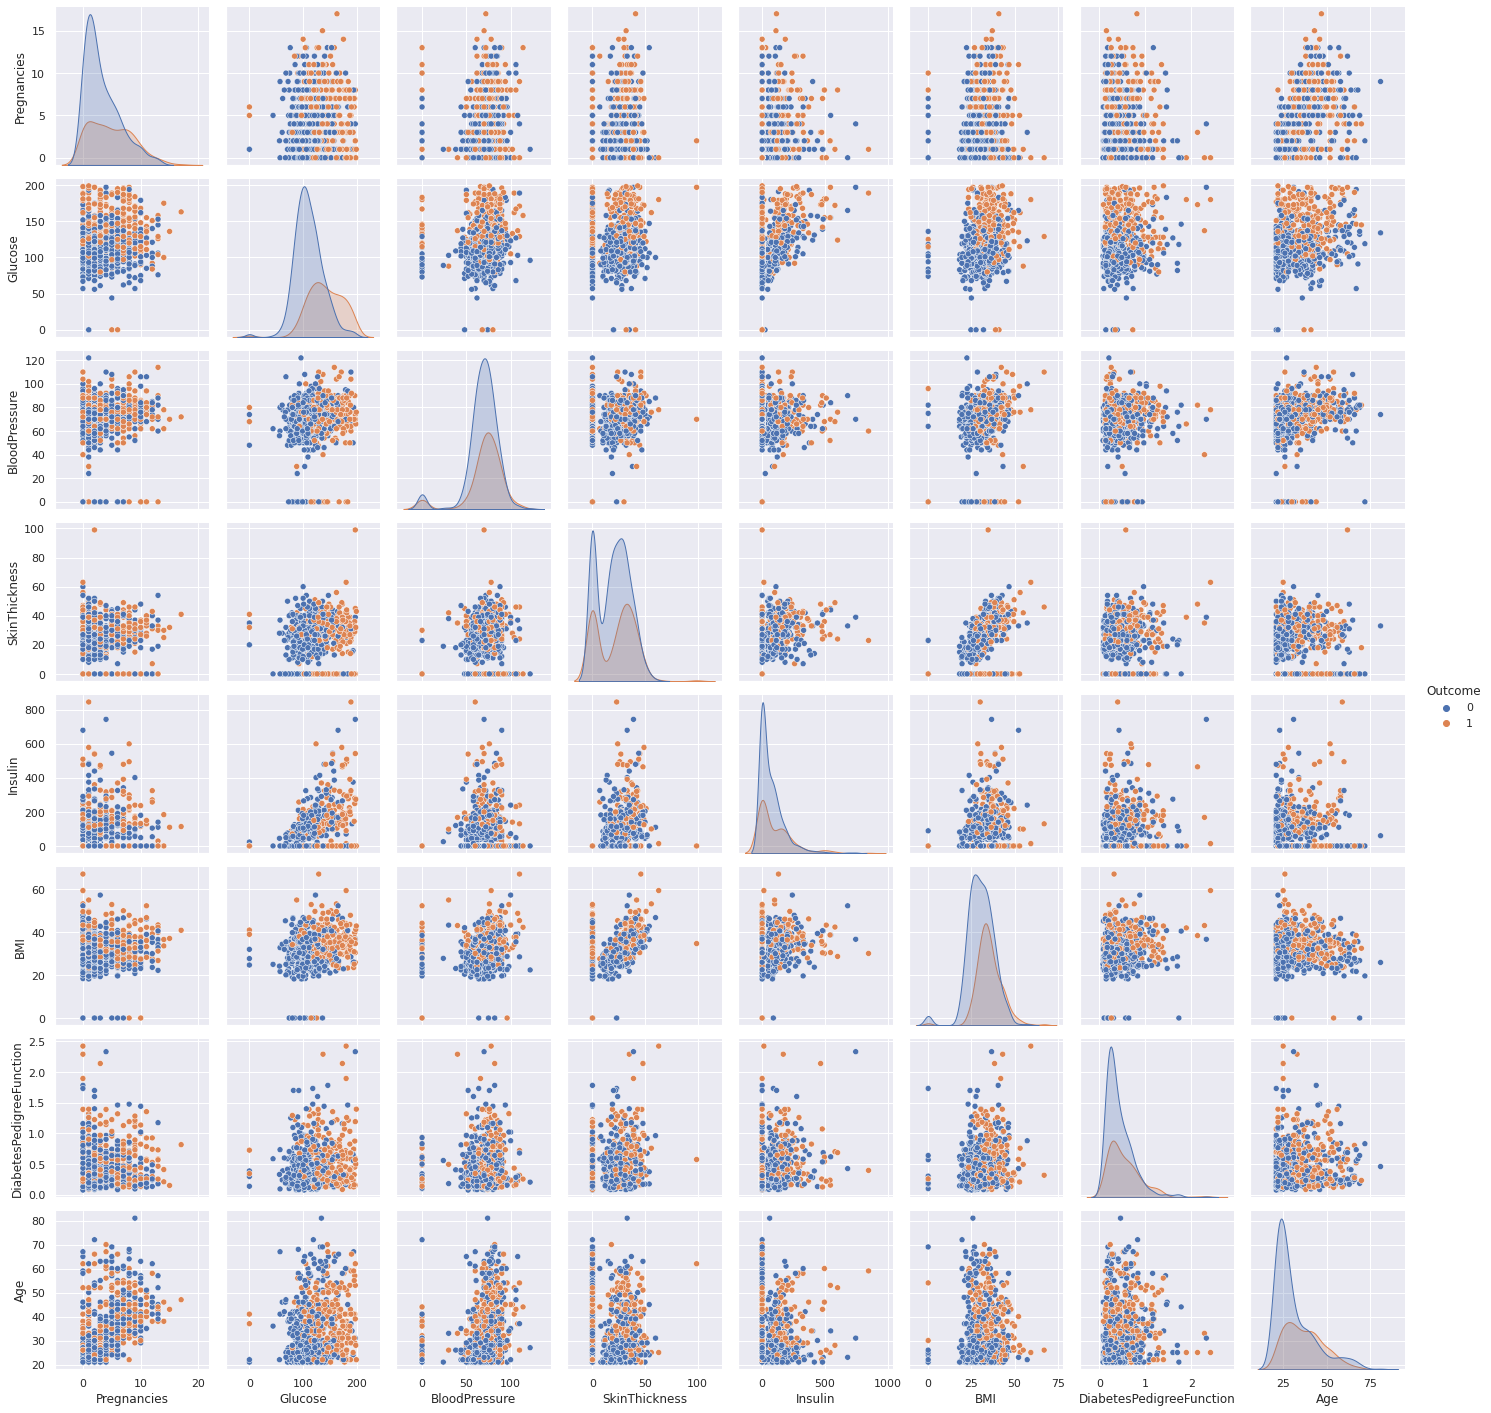

In [7]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Outcome')

### 4.6 Anomalies


Features **`Insulin, SkinThickness, BloodPressure, BMI, Glucose`** has many values equal to 0. With these features, value = 0 means that those data points are null (nan / na).

### 4.7 Train the model

**Note**

Here I will skip the Data Cleansing/Engineering proceess and proceed implementing the model as usual.

### 4.8 Train Test Split 

In [8]:
# 1. Split df to X, y
# 2. Print out the shape of X, y to check
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [9]:
# 1. Split X, y into Train and Test Set
# 2. test_size=0.4
# 3. Remember to set stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, shuffle=True, random_state=1612)

### 4.9 Create and Train the Decision Tree and Random Forest

In [11]:
# 1. Create model for Decision Tree and RandomForest
# 2. Fit both models on Train Set
# 3. Use score() function on Train Set and Test Set

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

model_decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=1612)
model_randomforest = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1613, n_estimators=300)

model_decisiontree.fit(X_train, y_train)
model_randomforest.fit(X_train, y_train)

print('Decision Tree score on Train Set: ' + str(model_decisiontree.score(X_train, y_train)))
print('Decision Tree score on Test Set: ' + str(model_decisiontree.score(X_test, y_test)))

print('Random Forest score on Train Set: ' + str(model_randomforest.score(X_train, y_train)))
print('Random Forest score on Test Set: ' + str(model_randomforest.score(X_test, y_test)))

Decision Tree score on Train Set: 0.808695652173913
Decision Tree score on Test Set: 0.7435064935064936
Random Forest score on Train Set: 0.8326086956521739
Random Forest score on Test Set: 0.7597402597402597


### 4.10 Reference for other hyper-parameters of Random Forest and further tuning on both models for better performance:  

[Random Forest's hyper-parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
